In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import scipy.stats as stat
import pylab 
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'D:/PYTHON/heart_disease.csv', sep=";")
print(df.head())

    age  sex   cp  trestbps    cho  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  target  
0    3.0  0.0   6.0    0       1  
1    2.0  3.0   3.0    2       1  
2    2.0  2.0   7.0    1       1  
3    3.0  0.0   3.0    0       1  
4    1.0  0.0   3.0    0       1  


In [4]:
df.describe()

,age,sex,cp,trestbps,cho,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.683168,4.732673,0.937294,0.551155
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.944808,1.937215,1.228536,0.498199
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   cho       303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
 14  target    303 non-null    int64  
dtypes: float64(13), int64(2)
memory usage: 35.6 KB


In [6]:
df.shape

(303, 15)

In [7]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes !='object']
categorical_features= [feature for feature in df.columns if df[feature].dtypes =='object']
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<20]
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]

<Axes: >

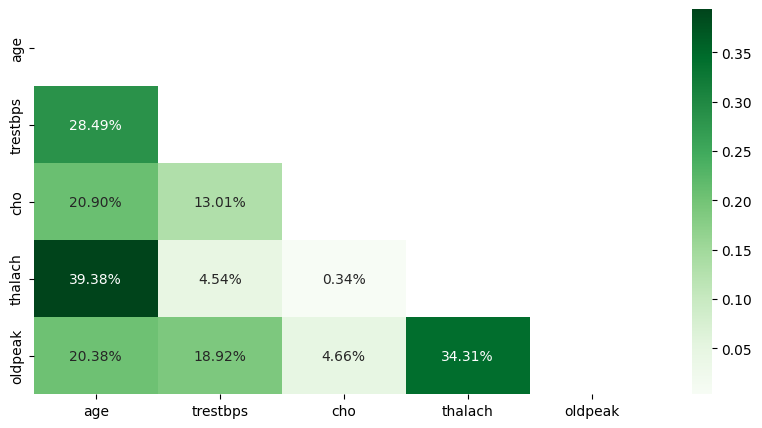

In [8]:
#continuos feature korelasyon
plt.figure(figsize=(10, 5))
sns.heatmap(df[continuous_feature].corr().abs(), cmap='Greens',mask=np.triu(df[continuous_feature].corr()),fmt = '.2%', annot=True)

In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
cho         0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
target      0
dtype: int64

In [10]:
df['oldpeak'].unique()

array([2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 3.1, 0.4, 1.3, 0. , 0.5,
       1.6, 1. , 1.2, 0.2, 1.8, 3.2, 2.4, 2. , 2.5, 2.2, 2.8, 3. , 3.4,
       6.2, 4. , 5.6, 2.9, 0.1, 2.1, 1.9, 4.2, 0.9, 1.1, 3.8, 0.7, 0.3,
       4.4])

In [11]:
# Örnek Oldpeak sınıflandırması
def classify_oldpeak(oldpeak_value):
    if oldpeak_value < -2.5:
        return 'Şiddetli ST Depresyonu'
    elif -2.5 <= oldpeak_value < -1:
        return 'Orta Derecede ST Depresyonu'
    elif -1 <= oldpeak_value < 0:
        return 'Hafif ST Depresyonu'
    elif 0 <= oldpeak_value < 1:
        return 'Hafif ST Yükselmesi'
    elif 1 <= oldpeak_value < 2:
        return 'Orta Derecede ST Yükselmesi'
    else:
        return 'Şiddetli ST Yükselmesi'
# DataFrame'e uygula
df['Oldpeak_Category'] = df['oldpeak'].apply(classify_oldpeak)

In [12]:
cholesterol_values = np.array([199, 200, 240])
low_limit = 200
high_limit = 240
df['Cholesterol_Group'] = np.where(df['cho'] <= low_limit, 0, np.where(df['cho']< high_limit, 1, 2)).astype(int)

In [13]:
df['Age_Group'] = pd.cut(df['age'], bins=[19, 29, 49, 64, 99], labels = [0, 1, 2, 3]).astype('int16')

In [14]:
normal_trestbps=(60,120)
df['trestbps_Group'] = np.where(df['trestbps'] <= low_limit, 0, np.where(df['trestbps']< high_limit, 1, 2)).astype(int)

In [15]:
#Normal: 120≤Thalach≤160
normal_thalach=(60,120)
df['thalach_Group'] = np.where(np.logical_and(df['thalach'] >= normal_thalach[0] , df['thalach']<=normal_thalach[1]), 1, 0).astype(int)

In [16]:
df=df.drop(['cho','age','trestbps'],axis=1)

In [17]:
df=pd.get_dummies(df, drop_first=True, dtype=int)

In [18]:
df.head()

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target,Cholesterol_Group,Age_Group,trestbps_Group,thalach_Group,Oldpeak_Category_Orta Derecede ST Yükselmesi,Oldpeak_Category_Şiddetli ST Yükselmesi
0,1.0,1.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,1,1,2,0,0,0,1
1,1.0,4.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,2,3,0,1,1,0
2,1.0,4.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,1,3,0,0,0,1
3,1.0,3.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,1,2,1,0,0,0,1
4,0.0,2.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,1,1,0,0,1,0


In [19]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes !='object']
categorical_features= [feature for feature in df.columns if df[feature].dtypes =='object']
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<20]
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]

<Figure size 3000x12000 with 0 Axes>

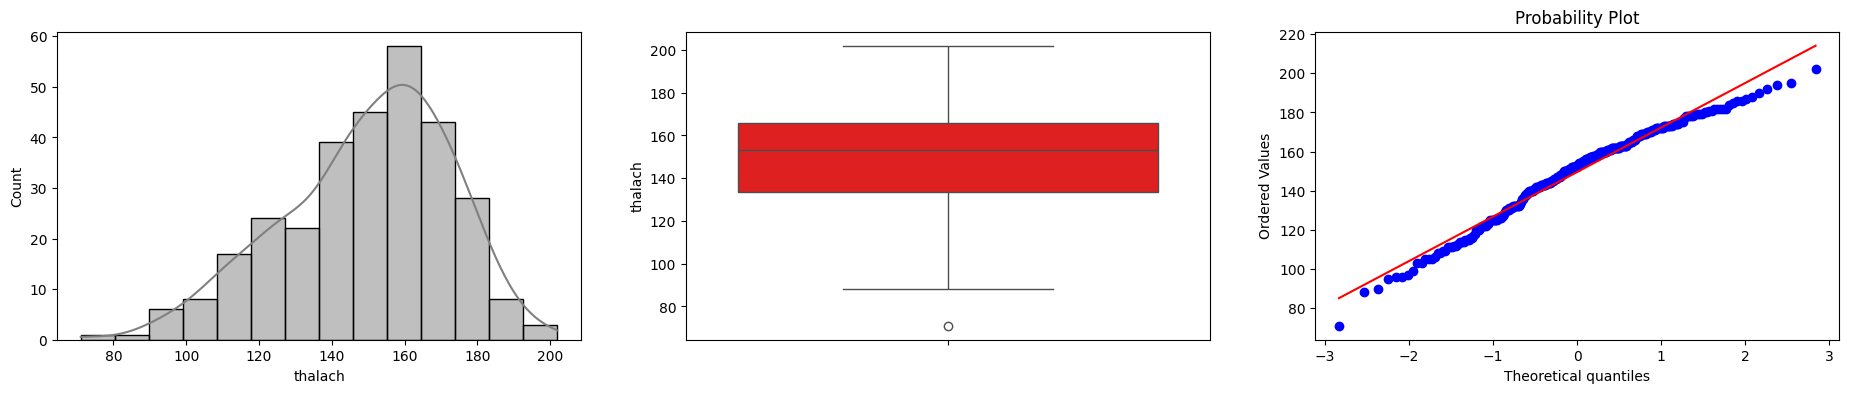

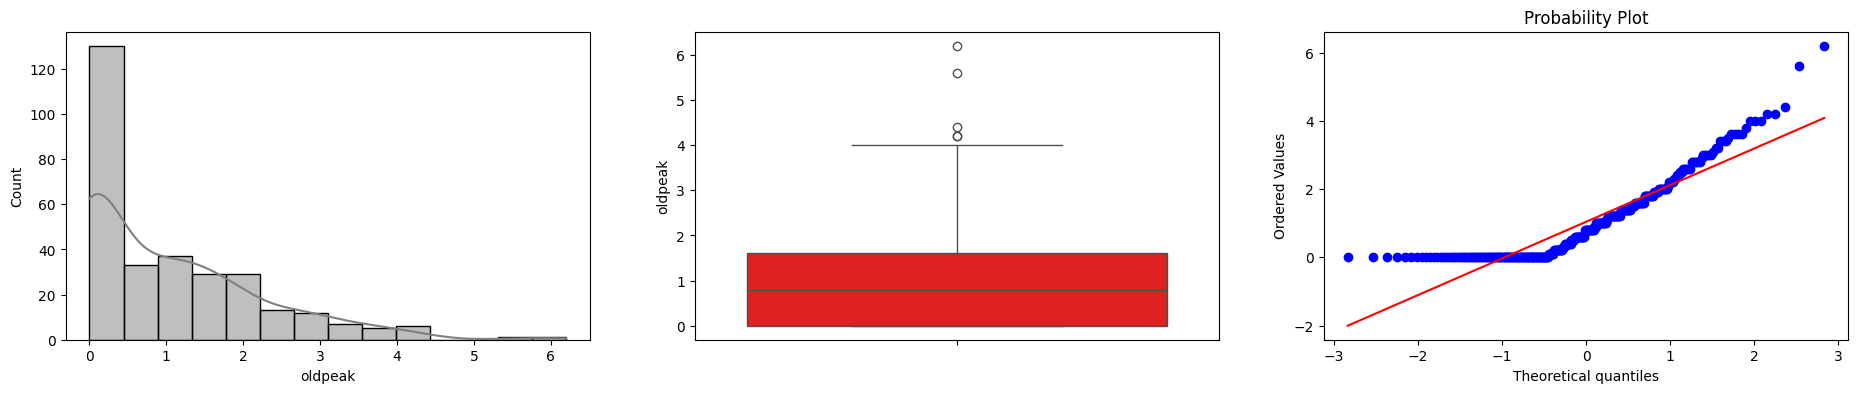

In [20]:
plt.figure(figsize=(30,120),facecolor='white')
plotnumber=1
for feature in continuous_feature:
                plt.figure(figsize=(23,4))
                plt.subplot(1,3,1)
                sns.histplot(df[feature],color="gray", kde=True)
                plt.subplot(1,3,2)
                sns.boxplot(df[feature],color='red')
                plt.subplot(1,3,3)
                stat.probplot(df[feature],dist='norm',plot=pylab)
plt.show()

In [21]:
for col in continuous_feature:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    df[col]= np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))

<Figure size 3000x12000 with 0 Axes>

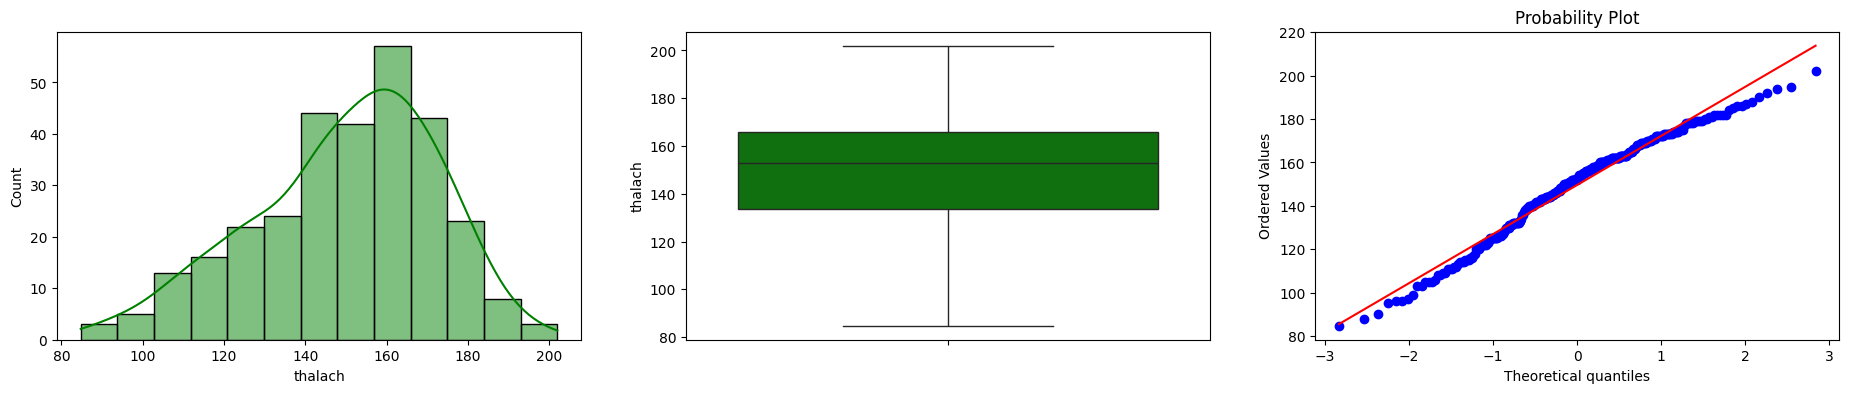

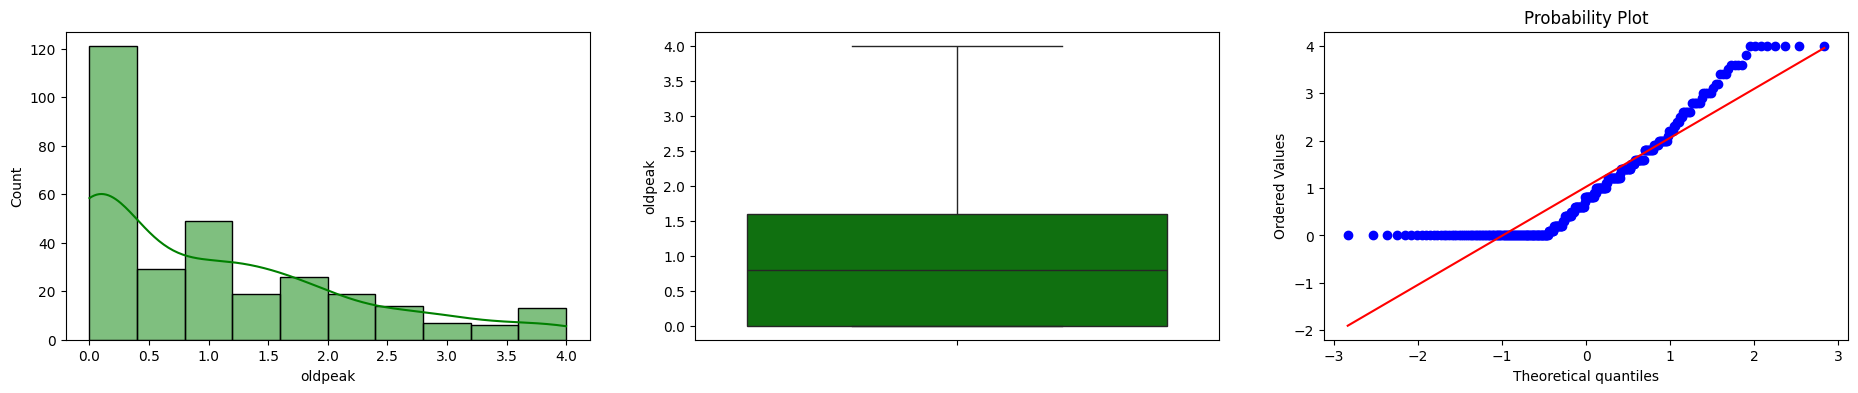

In [22]:
plt.figure(figsize=(30,120),facecolor='white')
plotnumber=1
for feature in continuous_feature:
                plt.figure(figsize=(23,4))
                plt.subplot(1,3,1)
                sns.histplot(df[feature],color="green", kde=True)
                plt.subplot(1,3,2)
                sns.boxplot(df[feature],color='green')
                plt.subplot(1,3,3)
                stat.probplot(df[feature],dist='norm',plot=pylab)
plt.show()

In [23]:
X = df.iloc[:, ].values
X

array([[1., 1., 1., ..., 0., 0., 1.],
       [1., 4., 0., ..., 1., 1., 0.],
       [1., 4., 0., ..., 0., 0., 1.],
       ...,
       [1., 4., 0., ..., 1., 1., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       [1., 3., 0., ..., 0., 0., 0.]], shape=(303, 18))

In [24]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

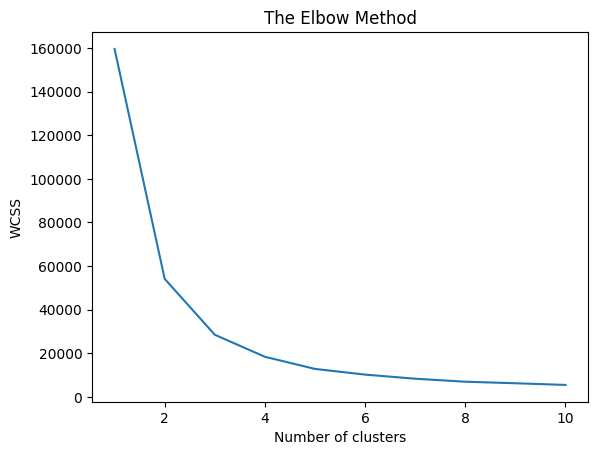

In [25]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Farklı küme sayıları için Silhouette Score'u hesapla
for n_clusters in range(2, 14):
    kmeans =  KMeans(n_clusters = n_clusters, n_init=14)
    cluster_labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"inertia = {n_clusters}, Silhouette Score = {silhouette_avg}")

inertia = 2, Silhouette Score = 0.5541277113754777
inertia = 3, Silhouette Score = 0.48405440717340587
inertia = 4, Silhouette Score = 0.46291316479604006
inertia = 5, Silhouette Score = 0.4489840761780286
inertia = 6, Silhouette Score = 0.42886583046431703
inertia = 7, Silhouette Score = 0.4242884447137589
inertia = 8, Silhouette Score = 0.40099667594041355
inertia = 9, Silhouette Score = 0.375558929789125
inertia = 10, Silhouette Score = 0.3731986345301455
inertia = 11, Silhouette Score = 0.3594319750553039
inertia = 12, Silhouette Score = 0.3263926065514715
inertia = 13, Silhouette Score = 0.3005023189356113


In [27]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', n_init=14)

y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0
 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1
 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1
 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1
 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0
 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1
 0 0 0 0 0 1 1]
